<a href="https://colab.research.google.com/github/Bhadanishubham/MachineLearning01/blob/master/MachineLearning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1)

# Importing Standard Libraries


In [3]:
import pandas as pd
import numpy as np # mathematical calculations
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # plotting graphs
%matplotlib inline
import warnings # Ignore warnings
warnings.filterwarnings("ignore") 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Reading the Data

In [4]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df_copy=df.copy() 

Displaying Top Rows

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Displaying Bottom Rows

In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


Names of Variable & Shape of Dataset

In [5]:
print(df.columns)
print(df.shape)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
(5000, 14)


# Description of Variables

ID: Customer identication

Age: Customer’s age in completed years

Income: Annual income of customer


ZIP Code: Customer Home Address


Family: Family size of customer

CCAvg: Average spending on credit cards per month


Education: Undergraduate / Graduate / Advanced professional

Mortgage: Value of house (if any)

Securities Account: If customer has securities account with the bank

CD Account: Customer certicate of deposit with the bank

Online: If customer use online banking facilities

Credit Card: If Customer use credit card issued by Universal Bank

Personal Loan: If customer had accepted personal loan offered in last campaign`

In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# (2)Cleaning of Any Unnecessary Variables

In [7]:
E=df['Experience']
A=df['Age']
correlation=E.corr(A)
correlation


0.9942148569683321

Dropping Highly Correlated Columns

In [8]:
df.drop('ID', axis=1,inplace=True)
df.drop('Experience',axis=1,inplace=True)


In [9]:
df.head()


,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
duplicate_rows_df=df[df.duplicated()]
print("No. of Duplicate Rows",duplicate_rows_df)


No. of Duplicate Rows Empty DataFrame
Columns: [Age, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


In [11]:
df = df.dropna()
df.count()


Age                   5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   ZIP Code            5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 507.8 KB


In [ ]:
df.isnull().sum()

Age                   0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# (3)Exploratory Data Analysis

Number of Unique in Each Columns

In [13]:
df.nunique()


Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Number of People with Zero Mortgages

In [14]:
 df[df['Mortgage']==0] ['Mortgage'].count()


3462

Number of People with Zero Credir Card Spending per Month

In [15]:
df[df['CCAvg']==0] ['CCAvg'].count()


106

Value Counts of All Categorical Columns

In [16]:
df.Education.value_counts()


1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [17]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [18]:
df['CreditCard'].value_counts()


0    3530
1    1470
Name: CreditCard, dtype: int64

In [19]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [20]:
df['Securities Account'].value_counts()


0    4478
1     522
Name: Securities Account, dtype: int64

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   ZIP Code            5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 507.8 KB


Univariate and Bivariate Analysis

In [22]:
!pip install -U pandas-profiling

     |████████████████████████████████| 266kB 3.4MB/s 
     |████████████████████████████████| 71kB 5.3MB/s 
     |████████████████████████████████| 604kB 12.3MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 3.1MB 18.2MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 296kB 40.4MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=aafb8b4d3fcb8382c6ad963381c9d6537bea3b40a9ec6c5d75b4c89fec96e8bf
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=623661fa36ba35f3c3e967807377c78ab9093633a52d078ba7d012fa4cfab63d
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Un

Univariate Analysis with help of pandas-profiling

In [23]:
import pandas_profiling
df.profile_report()

Categorical Independent Variable vs Target Variable

cross tabulation can be given as : 
 Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205


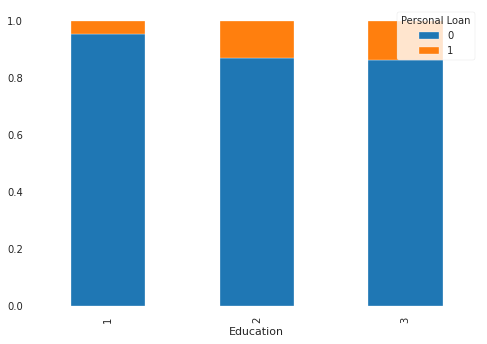

In [24]:
edu=pd.crosstab(df['Education'],df['Personal Loan'])
edu.div(edu.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as :','\n',edu)

From above plot we can infer that customers who are more educated have higher probability of
buying personal loans. Hence, the hypothesis was true.

cross tabulation can be given as : 
 Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134


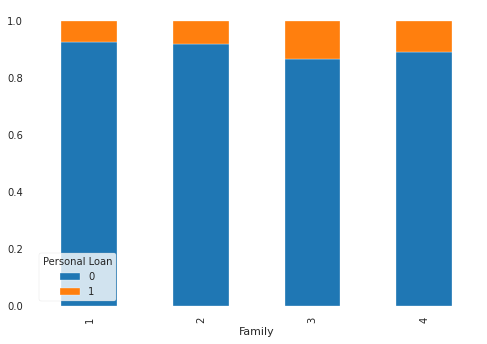

In [25]:
family=pd.crosstab(df['Family'],df['Personal Loan'])
family.div(family.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as :','\n',family)

Boolean Independent Variable Vs Target Variable

cross tabulation can be given as : 
 Personal Loan     0    1
CD Account              
0              4358  340
1               162  140


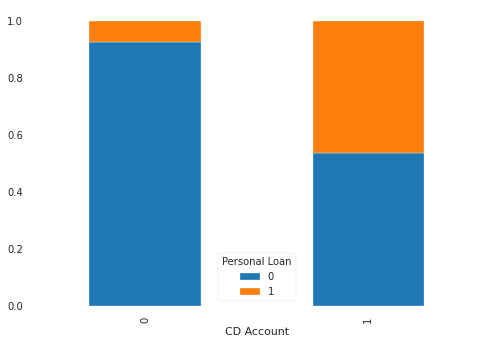

In [26]:
cd=pd.crosstab(df['CD Account'],df['Personal Loan'])
cd.div(cd.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as :','\n',cd)

cross tabulation can be given as : 
 Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143


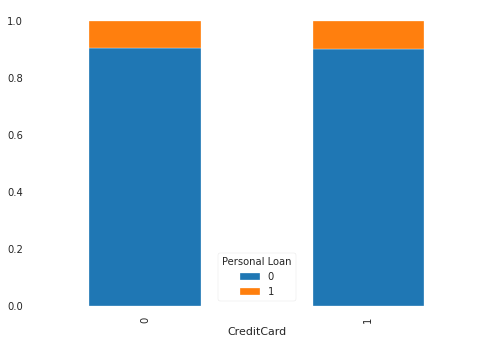

In [27]:
credit=pd.crosstab(df['CreditCard'],df['Personal Loan'])
credit.div(credit.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as :','\n',credit)

cross tabulation can be given as : 
 Personal Loan     0    1
Online                  
0              1827  189
1              2693  291


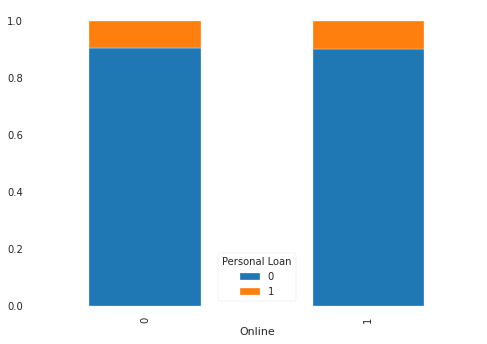

In [28]:
online=pd.crosstab(df['Online'],df['Personal Loan'])
online.div(online.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as :','\n',online)


cross tabulation can be given as : 
 Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60


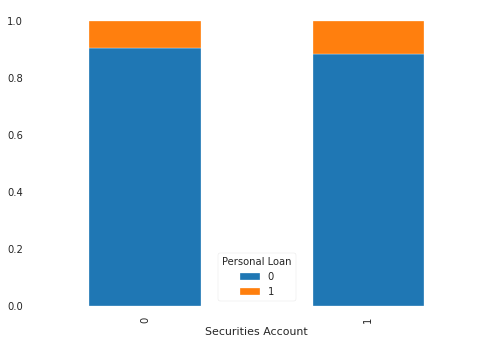

In [29]:
sec=pd.crosstab(df['Securities Account'],df['Personal Loan'])
sec.div(sec.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as :','\n',sec)

Numerical Independent Variable Vs Target Variable

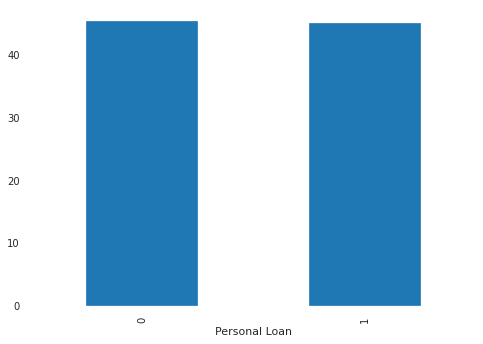

In [30]:
df.groupby('Personal Loan')['Age'].mean().plot(kind='bar')


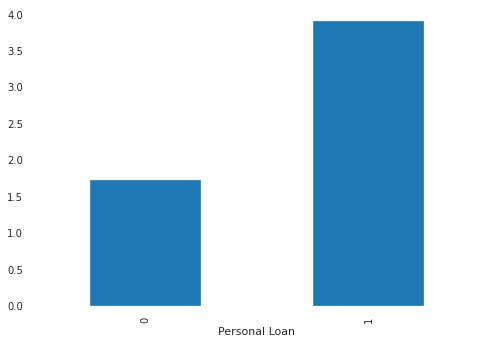

In [31]:
df.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar')

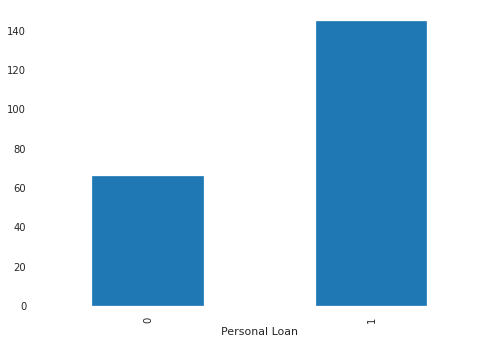

In [32]:
df.groupby('Personal Loan')['Income'].mean().plot(kind='bar')


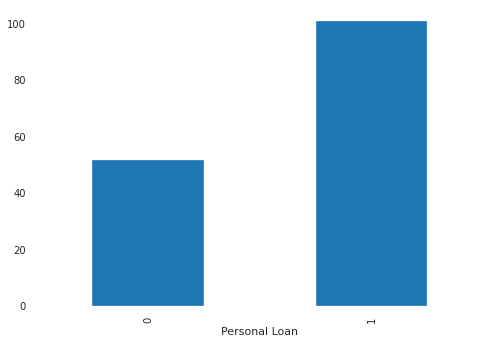

In [33]:
df.groupby('Personal Loan')['Mortgage'].mean().plot(kind='bar')


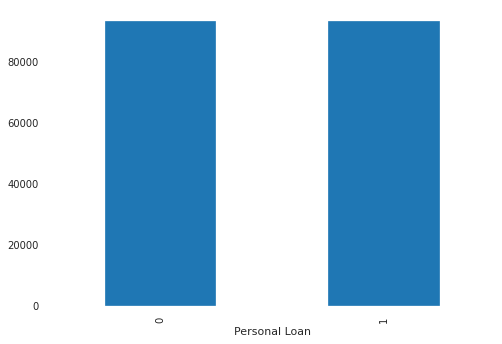

In [34]:
df.groupby('Personal Loan')['ZIP Code'].mean().plot(kind='bar')


In [35]:
# DROPPING UNNECESSARY COLUMN

df.drop('ZIP Code',axis=1, inplace=True)


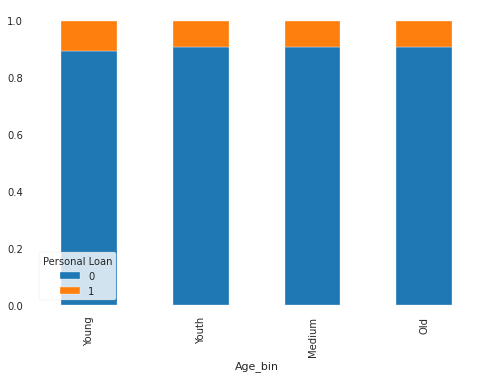

In [36]:
# CREATING BINS
bins=[23,35,45,55,67]
group=['Young','Youth','Medium','Old']
df['Age_bin']=pd.cut(df['Age'],bins,labels=group) 
age=pd.crosstab(df['Age_bin'],df['Personal Loan'])
age.div(age.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [37]:
df.drop('Age_bin',axis=1,inplace=True)


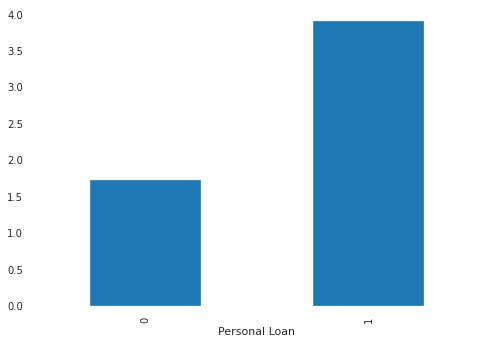

In [38]:
df.groupby('Personal Loan')["CCAvg"].mean().plot(kind='bar')


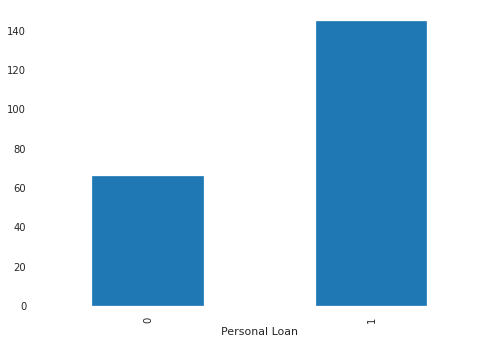

In [39]:
# HOW INCOME OF CUSTOMETER AFFECTS

df.groupby('Personal Loan')['Income'].mean().plot(kind='bar')


Checking for missing Values


In [40]:
df.isnull().sum()


Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# (4) Applying Necessary Transformations

       




1.   Since, the dataset has many outliers which can be seen in Univariate Analysis with the help
of Kurtosis. Outliers has signicant effect on the mean and standard deviation hence,
affecting the distribution.
2.   Due to these Outliers bulk of the data in the Mortgage is at the left and the right tail is
longer. This is called Right Skewness. This can be removed by doing Z-score test.


In [41]:
# REMOVING RIGHT SKEWNESS USING Z-SCORE (Z=(x-MEAN)/S)

from scipy import stats
df['Mortgage_zscore']=np.abs(stats.zscore(df['Mortgage']))
df=df[df['Mortgage_zscore']<3]
df.drop('Mortgage_zscore',axis=1,inplace=True)


In [42]:
x=df.drop('Personal Loan',axis=1) 
y=df['Personal Loan'].values 
np.unique(y)


array([0, 1])

# (5) Normalising and Splitting Data

In [43]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [44]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3426, 10) (1469, 10) (3426,) (1469,)


# (6)Model Building: Logistic Regression Classifier

In [45]:
from sklearn.linear_model import LogisticRegression #importing model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc


In [ ]:
#np.unique(y)

In [46]:
LogReg_model=LogisticRegression()
LogReg_model.fit(x_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred=LogReg_model.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1324
           1       0.71      0.48      0.58       145

    accuracy                           0.93      1469
   macro avg       0.83      0.73      0.77      1469
weighted avg       0.92      0.93      0.92      1469

0.9298842750170184
[[1296   28]
 [  75   70]]


In [48]:
Log_Reg_prob=LogReg_model.predict_proba(x_test)
fpr2,tpr2,thresholds2=roc_curve(y_test,Log_Reg_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.940077


93% accuracy, 94% area under ROC curve, recall 48*

In [49]:
# STANDARDIZATION (Z(scale)= X-U/S) FOR ACCURATE RESULTS

from sklearn import preprocessing 

col_names=df.columns 
scaler=preprocessing.StandardScaler() 
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.fit_transform(x_test) 

In [50]:
LogReg_model=LogisticRegression()
LogReg_model.fit(scaled_x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred=LogReg_model.predict(scaled_x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1324
           1       0.84      0.59      0.70       145

    accuracy                           0.95      1469
   macro avg       0.90      0.79      0.83      1469
weighted avg       0.95      0.95      0.94      1469

0.9489448604492853
[[1308   16]
 [  59   86]]


In [52]:
Log_Reg_prob=LogReg_model.predict_proba(x_test)
fpr2,tpr2,thresholds2=roc_curve(y_test,Log_Reg_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.516994


95% accuracy, 59% recall value which means the model did much better in predicting the positives.

NAIVE BAYES CLASSIFIER


In [53]:
# NAIVES BAYES

from sklearn.naive_bayes import GaussianNB

naives_model=GaussianNB()
naives_model.fit(scaled_x_train,y_train)
y_pred=naives_model.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1324
           1       0.45      0.52      0.48       145

    accuracy                           0.89      1469
   macro avg       0.70      0.73      0.71      1469
weighted avg       0.90      0.89      0.89      1469

0.8897208985704561
[[1231   93]
 [  69   76]]


In [54]:
naive_prob=naives_model.predict_proba(scaled_x_test)
fpr3,tpr3,threshold3=roc_curve(y_test,naive_prob[:,1])
roc_auc3=auc(fpr3,tpr3)

print("Area under the ROC curve : %f" % roc_auc3)


Area under the ROC curve : 0.927795


accuracy 89% with area under curve is 92% wich is less compared to logistic regression.

KNN NEAREST NEIGHBOR CLASSIFIER

In [55]:
# KNN (Supervised Algorithm)
# Important Parameters are n_neighbors, weights, algorithm, metric(Euclidean)

from sklearn.neighbors import KNeighborsClassifier
KNN_model=GaussianNB()
KNN_model.fit(scaled_x_train,y_train)
y_pred=KNN_model.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1324
           1       0.45      0.52      0.48       145

    accuracy                           0.89      1469
   macro avg       0.70      0.73      0.71      1469
weighted avg       0.90      0.89      0.89      1469

0.8897208985704561
[[1231   93]
 [  69   76]]


In [56]:
KNN_prob=naives_model.predict_proba(scaled_x_test)
fpr4,tpr4,threshold4=roc_curve(y_test,KNN_prob[:,1])
roc_auc4=auc(fpr4,tpr4)

print("Area under the ROC curve : %f" % roc_auc4)


Area under the ROC curve : 0.927795


89% accuracy with 52% recall value which similar to Naive bayes classifier bur not good as comopared to logistic regression.

SVM CLASSIFIER


In [57]:
# SVM (Support Vector Machine, a discriminative classifier
# Algorithm outputs an optimal hyperplane, dividing plane to 2 parts
# To see if it can classify between buyer and a non-buyer

from sklearn import svm

clf=svm.SVC(C=3,kernel='rbf',probability=True)
clf.fit(scaled_x_train,y_train)
y_pred=clf.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1324
           1       0.92      0.77      0.83       145

    accuracy                           0.97      1469
   macro avg       0.95      0.88      0.91      1469
weighted avg       0.97      0.97      0.97      1469

0.9700476514635806
[[1314   10]
 [  34  111]]


In [58]:
svm_prob=clf.predict_proba(scaled_x_test)
fpr5,tpr5,threshold5=roc_curve(y_test,svm_prob[:,1])
roc_auc5=auc(fpr5,tpr5)

print("Area under the ROC curve : " ,roc_auc5)


Area under the ROC curve :  0.9830242733618085


97% accuracy with 77% recall value and area under the curve is 98% so SVM can be deployed to predict the likelihood of liability customer buying personal oan.

DECISION TREES CLASSIFIER

In [59]:
# DECISION TREES

from sklearn.tree import DecisionTreeClassifier

dec_tree_e=DecisionTreeClassifier(criterion='entropy',random_state=1)
dec_tree_e.fit(scaled_x_train,y_train)
y_pred=dec_tree_e.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1324
           1       0.91      0.90      0.91       145

    accuracy                           0.98      1469
   macro avg       0.95      0.95      0.95      1469
weighted avg       0.98      0.98      0.98      1469

0.9816201497617427
[[1311   13]
 [  14  131]]


In [60]:
dec_prob=dec_tree_e.predict_proba(scaled_x_test)
#print(dec_prob)

fpr5,tpr5,threshold5=roc_curve(y_test,dec_prob[:,1])
roc_auc5=auc(fpr5,tpr5)

print("Area under the ROC curve : " ,roc_auc5)

Area under the ROC curve :  0.9468147723721222


98%accuracy, 90% recall value and 94% area under curve which is nice.

In [61]:
# USING CRITERION 'gini'

from sklearn.tree import DecisionTreeClassifier

dec_tree_g=DecisionTreeClassifier(criterion='gini',random_state=1)
dec_tree_g.fit(scaled_x_train,y_train)
y_pred=dec_tree_g.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1324
           1       0.86      0.83      0.85       145

    accuracy                           0.97      1469
   macro avg       0.92      0.91      0.91      1469
weighted avg       0.97      0.97      0.97      1469

0.9700476514635806
[[1304   20]
 [  24  121]]


In [62]:
dec_prob=dec_tree_g.predict_proba(scaled_x_test)
#print(dec_prob)

fpr5,tpr5,threshold5=roc_curve(y_test,dec_prob[:,1])
roc_auc5=auc(fpr5,tpr5)

print("Area under the ROC curve : " ,roc_auc5)


Area under the ROC curve :  0.9096885092197105


97% accuracy, 83% recall value with 90%auc.results are fine but area under ROC curve is still less.

In [63]:
# FOR DECISION TREE USING CRITERION = entropy

print(dec_tree_e.score(scaled_x_train,y_train))


1.0


In [64]:
# FOR DECISION TREE USING CRITERION = gini

print(dec_tree_g.score(scaled_x_train,y_train))

1.0


Biggest disadvantage of Decision tree is it overts the data. To overcome this, we can use hyoerparameters to do the pruning/cutting down it's branches so that it generalizes well.


## (9)Business Understanding of My Model

as the bank loan model is given here, the likelihood of taking personal loan is depend upon so many factors. It's depend upon the person's age, his income, so many things. There are so many things relate to each other just like corelated. sometimes age doesn't matter in front of their income. but we have to consider both the factors.dropping all the unnecessary culomns and plotting graph between income and age, age and zip code shoows us theliability of the loan.consider person has interested in taking loan but their past experiance with bank is not that good so little bit difficult for him but their income and age and experiance  is enough to showcase.by using different model, we come to know that some model has too much similarity in accuracy and recall value of taking loan but some model shows too mant effects and worse value that shows that better result achieve by proper model based technique only.